# Lesson 3: Array-oriented programming

Our analysis of Higgs data with NumPy arrays didn't use may `if` or `for` statements at all.

<br>

The general pattern consists of a single Python extension call that operates on many data values (_similar to_ "SIMD": Single Instruction, Multiple Data).

<br>

This pattern can be called a programming language paradigm, contrasted with "imperative," "functional," "object-oriented," etc.

In [1]:
import numpy as np

<br>

**Imperative programming:**

In [2]:
input_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
output_data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
for i in range(len(input_data)):                                  # you say what happens to each element
    output_data[i] = input_data[i]**2                             # in an exactly specified order (for loop)
output_data

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

<br>

**Functional programming:**

In [3]:
input_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
output_data = np.fromiter(map(lambda x: x**2, input_data), int)   # you provide a function to be applied to
output_data                                                       # each element; may run in any order

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

<br>

**Array-oriented programming:**

In [4]:
input_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
output_data = input_data**2                                       # implicit indexes, no reference to individual
output_data                                                       # elements; function is hard-coded in C

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

Most array-oriented programming languages have been interactive, intended for data analysis or simulation.

(This is a list of _all_ array-oriented languages that I know about.)

<br>

<center>
<img src="img/apl-timeline.svg" width="75%">
</center>

They have also tended to be concise (for quick typing, reduced screen clutter).

<br>

The original, APL, was way too concise! (Needed a special keyboard for all the math symbols.)

<br>

<center>
<div style="display: inline-block">

| APL | <br> | Numpy |
|:---:|:----:|:-----:|
| <tt>ι4</tt> | <br> | <tt>np.arange(4)</tt> |
| <tt>(3+ι4)</tt> | <br> | <tt>np.arange(4) + 3</tt> |
| <tt>+/(3+ι4)</tt> | <br> | <tt>(np.arange(4) + 3).sum()</tt> |
| <tt>m ← +/(3+ι4)</tt> | <br> | <tt>m = (np.arange(4) + 3).sum()</tt> |

</div>

<img src="img/apl-keyboard.jpg" width="25%" style="display: inline-block; margin-left: 10%">

</center>

Development/debuggin interaction pattern in oridinary programming: step through instructions on each _value_ in a debugger (breakpoints, etc.)

<br>

Data analysis interaction pattern: stop after key _operations_ and look at _distributions_ of all values.

<br>

Example: suppose you have a million data points.

In [5]:
import matplotlib.pyplot as plt

<br>

In [6]:
dataset = np.random.normal(0, 1, 1000000)
dataset

array([ 0.91514266,  0.92395022,  0.59067835, ..., -0.38605771,
        0.77751723,  0.14181228])

<br>

(Seeing 6 numerical values doesn't tell us about the other 999994.)

"What does the distribution look like?"

<br>

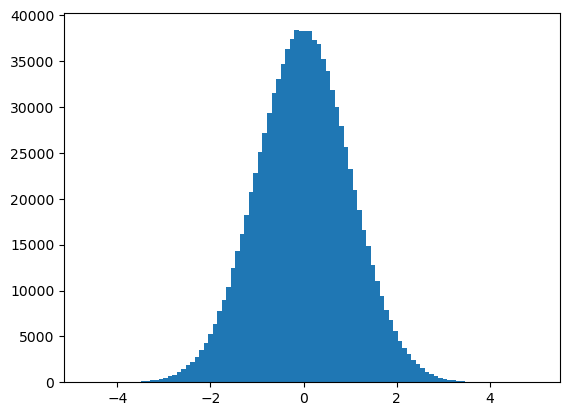

In [7]:
plt.hist(dataset, bins=100);

<br>

Of course, it's Gaussian/normal-distributed. (That's what we had asked for with `np.random.normal`.)

"What does its square look like?"

In [8]:
dataset2 = dataset**2

<br>

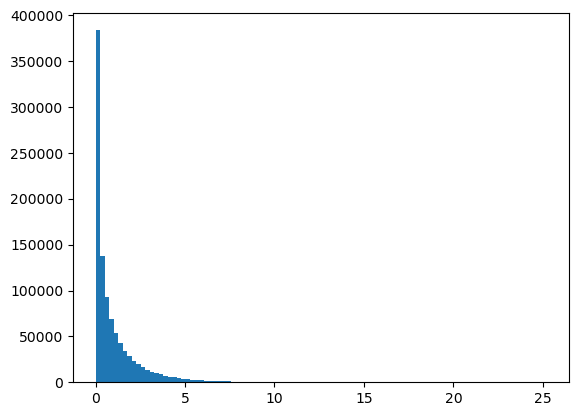

In [9]:
plt.hist(dataset2, bins=100);

<br>

"Of course. It's always positive, peaks at 0, and falls off to 9, rather than 3."

"What does this crazy combination look like?"

In [10]:
dataset3 = np.sin(1/dataset2)

<br>

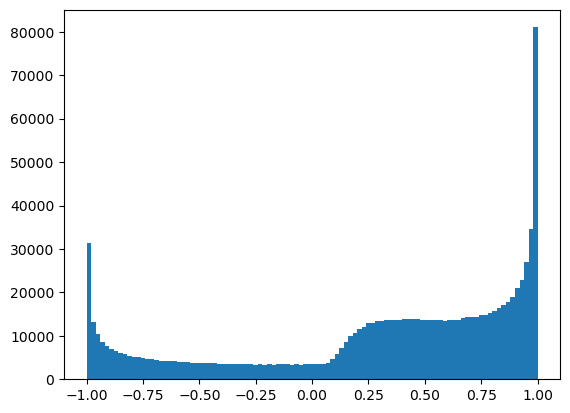

In [11]:
plt.hist(dataset3, bins=100);

<br>

I couldn't have guessed that shape: having the computer do it revealed something non-trivial.

History of paradigm-related words in CHEP titles & abstracts (Computing in HEP conferences from 1985 through present).

"Arrays" (originally, Fortran arrays) are making a comeback.

<br>

<center>
<img src="img/chep-papers-paradigm.svg" width="75%">
</center>

## Awkward Arrays

In exercise-1, we saw that particle physics analyses rely heavily on combinatorics.

In exercise-2, we saw that NumPy arrays and operations don't provide enough structure (in the data or operations).

<br>

The Awkward Array library was created to fill that gap.

Load Higgs data as an Awkward Array.

In [12]:
import awkward as ak

<br>

In [15]:
events = ak.from_parquet("data/SMHiggsToZZTo4L.parquet")
events

<Array [{run: 1, ...}, ..., {run: 1, ...}] type='299973 * {run: int32, lumi...'>

View the first event as Python lists and dicts (like JSON).

In [20]:
events[0].to_list()

{'run': 1,
 'luminosityBlock': 156,
 'event': 46501,
 'PV': {'x': 0.24369880557060242,
  'y': 0.3936990201473236,
  'z': 1.451307773590088},
 'electron': [],
 'muon': [{'pt': 63.04386901855469,
   'eta': -0.7186822295188904,
   'phi': 2.968005895614624,
   'mass': 0.10565836727619171,
   'charge': 1,
   'pfRelIso03_all': 0.0,
   'pfRelIso04_all': 0.0,
   'dxy': -0.004785160068422556,
   'dxyErr': 0.0060764215886592865,
   'dz': 0.09005985409021378,
   'dzErr': 0.044572051614522934},
  {'pt': 38.12034606933594,
   'eta': -0.8794569969177246,
   'phi': -1.0324749946594238,
   'mass': 0.10565836727619171,
   'charge': -1,
   'pfRelIso03_all': 0.0,
   'pfRelIso04_all': 0.0,
   'dxy': 0.0005746808601543307,
   'dxyErr': 0.0013040687190368772,
   'dz': -0.0032290113158524036,
   'dzErr': 0.003023269586265087},
  {'pt': 4.04868745803833,
   'eta': -0.320764422416687,
   'phi': 1.0385035276412964,
   'mass': 0.10565836727619171,
   'charge': 1,
   'pfRelIso03_all': 0.0,
   'pfRelIso04_all': 0.

Get one numeric field (also known as "column").

In [21]:
events.electron.pt

<Array [[], [21.9, ..., 23.8], ..., [48.1, 38.7]] type='299973 * var * float32'>

Compute something ($p_z = p_T \sinh\eta$).

In [22]:
events.electron.pt * np.sinh(events.electron.eta)

<Array [[], [-16.7, ..., -43.5], ..., [26.8, 74]] type='299973 * var * float32'>

To plot it, we need numbers without structure, so [ak.flatten](https://awkward-array.org/doc/main/reference/generated/ak.flatten.html) it.

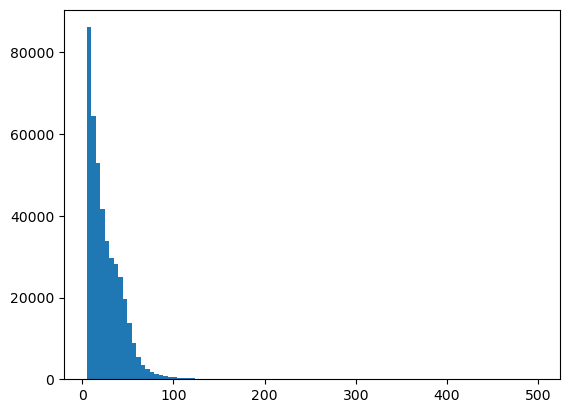

In [25]:
plt.hist(ak.flatten(events.electron.pt), bins=100);

Each event has a different number of electrons and muons ([ak.num](https://awkward-array.org/doc/main/reference/generated/ak.num.html) to check).

In [27]:
ak.num(events.electron), ak.num(events.muon)

(<Array [0, 4, 2, 1, 4, 1, 1, 1, ..., 0, 3, 0, 1, 0, 2, 2] type='299973 * int64'>,
 <Array [3, 0, 0, 7, 0, 2, 1, 0, ..., 2, 0, 2, 2, 4, 0, 0] type='299973 * int64'>)

<br>

So what happens if we try to compute something with the electrons' $p_T$ and the muons' $\eta$?

In [28]:
events.electron.pt * np.sinh(events.muon.eta)

ValueError: cannot broadcast nested list (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-12/awkward-cpp/src/cpu-kernels/awkward_ListArray_broadcast_tooffsets.cpp#L27)

This error occurred while calling

    numpy.multiply.__call__(
        <Array [[], [21.9, ...], ..., [48.1, 38.7]] type='299973 * var * fl...'>
        <Array [[-0.782, -0.997, -0.326], ..., []] type='299973 * var * flo...'>
    )

This is data structure-aware, array-oriented programming.

Before moving on, I should point out that we can get these data from ROOT files:

In [29]:
import uproot

<br>

In [30]:
file = uproot.open("data/SMHiggsToZZTo4L.root")
file

<ReadOnlyDirectory '/' at 0x7f79d805dcd0>

<br>

In [32]:
tree = file["Events"]
tree

<TTree 'Events' (32 branches) at 0x7f79925bcd90>

<br>

Uproot has several methods to read arrays (NumPy/Awkward/Pandas), but [uproot.TTree.arrays](https://uproot.readthedocs.io/en/latest/uproot.behaviors.TTree.TTree.html#arrays) is a general one.

In [40]:
tree.arrays(filter_name="Electron_*")

<Array [{Electron_pt: [], ...}, ..., {...}] type='299973 * {Electron_pt: va...'>

## Basic operations of Awkward Array

Illustrated with a small array.

In [41]:
array = ak.from_iter([[{"x": 1.1, "y": [1]}, {"x": 2.2, "y": [1, 2]}], [], [{"x": 3.3, "y": [1, 2, 3]}]])
array

<Array [[{x: 1.1, y: [1]}, {...}], ...] type='3 * var * {x: float64, y: var...'>

<br>

We've seen some selections (single item, by field name), but here they are for the small array:

In [42]:
array[0]

<Array [{x: 1.1, y: [1]}, {x: 2.2, ...}] type='2 * {x: float64, y: var * in...'>

In [43]:
array[0, "y", -1]

<Array [1, 2] type='2 * int64'>

We've seen mapped operations (NumPy ufuncs):

In [46]:
np.square(array["x"])

<Array [[1.21, 4.84], [], [10.9]] type='3 * var * float64'>

In [47]:
np.sqrt(array["y"])

<Array [[[1], [1, 1.41]], ..., [[1, ..., 1.73]]] type='3 * var * var * float64'>

Reducers ([ak.sum](https://awkward-array.org/doc/main/reference/generated/ak.sum.html), [ak.min](https://awkward-array.org/doc/main/reference/generated/ak.min.html), [ak.max](https://awkward-array.org/doc/main/reference/generated/ak.max.html), [ak.any](https://awkward-array.org/doc/main/reference/generated/ak.any.html), [ak.all](https://awkward-array.org/doc/main/reference/generated/ak.all.html), etc.) apply to lists of variable length, including zero length.

In [48]:
ak.sum(array["x"])

6.6

In [49]:
ak.sum(array["y"], axis=-1)

<Array [[1, 3], [], [6]] type='3 * var * int64'>

The `axis` parameter has the same meaning as in NumPy, but extended to allow for non-rectilinear data.

<center>
<img src="img/example-reduction-sum.svg" width="35%">
</center>

In [54]:
array2 = ak.from_iter([[   1,    2,    4],
                       [                ],
                       [None,    8      ],
                       [  16            ]])

<br>

In [51]:
ak.sum(array2, axis=0)

<Array [17, 10, 4] type='3 * int64'>

<br>

In [52]:
ak.sum(array2, axis=1)

<Array [7, 0, 8, 16] type='4 * int64'>

Slicing with boolean or integer arrays.

In [55]:
array

<Array [[{x: 1.1, y: [1]}, {...}], ...] type='3 * var * {x: float64, y: var...'>

In [57]:
array[[False, False, True]]

<Array [[{x: 3.3, y: [1, ...]}]] type='1 * var * {x: float64, y: var * int64}'>

In [58]:
array[[1, 1, 1, 2]]

<Array [[], [], [], [{x: 3.3, y: [...]}]] type='4 * var * {x: float64, y: v...'>

Slicing with arrays of _lists_ of booleans or integers.

In [59]:
array.y

<Array [[[1], [1, 2]], [], [[1, 2, 3]]] type='3 * var * var * int64'>

In [63]:
array.y[[[[True], [False, True]], [], [[False, True, False]]]]

<Array [[[1], [2]], [], [[2]]] type='3 * var * var * int64'>

In [65]:
array.y[[[[], [-1, -1, -1]], [], [[0, 1, 1, 1, 1, 1, 2]]]]

<Array [[[], [2, 2, 2]], ..., [[1, 2, ..., 2, 3]]] type='3 * var * var * int64'>

**Application:** Filtering events with an array of booleans.

In [72]:
events.MET.pt, events.MET.pt > 20

(<Array [21.9, 17, 19.1, 30.9, ..., 17.7, 24, 12.9] type='299973 * float32'>,
 <Array [True, False, False, True, ..., False, True, False] type='299973 * bool'>)

In [74]:
len(events), len(events[events.MET.pt > 20])

(299973, 163222)

<br>

**Application:** Filtering particles with an array of lists of booleans.

In [78]:
events.electron.pt, events.electron.pt > 30

(<Array [[], [21.9, ..., 23.8], ..., [48.1, 38.7]] type='299973 * var * float32'>,
 <Array [[], [False, ..., False], ..., [True, True]] type='299973 * var * bool'>)

In [79]:
ak.num(events.electron), ak.num(events.electron[events.electron.pt > 30])

(<Array [0, 4, 2, 1, 4, 1, 1, 1, ..., 0, 3, 0, 1, 0, 2, 2] type='299973 * int64'>,
 <Array [0, 2, 0, 0, 1, 0, 0, 0, ..., 0, 2, 0, 0, 0, 0, 2] type='299973 * int64'>)

**Quizlet:** Using the reducer [ak.any](https://awkward-array.org/doc/main/reference/generated/ak.any.html), how would we select _events_ in which any electron has $p_T > 30$ GeV/c$^2$?

In [83]:
events.electron[events.electron.pt > 30]

<Array [[], ..., [{pt: 48.1, ...}, {...}]] type='299973 * var * Momentum4D[...'>

**Bonus:** How would you do it with [ak.min](https://awkward-array.org/doc/main/reference/generated/ak.min.html)?

Awkward Array has two combinatorial primitives:

<table style="width: 50%">
    <tr style="background: white"><td style="font-size: 1.75em; font-weight: bold; text-align: center"><a href="https://awkward-array.org/doc/main/reference/generated/ak.cartesian.html">ak.cartesian</a></td><td style="font-size: 1.75em; font-weight: bold; text-align: center"><a href="https://awkward-array.org/doc/main/reference/generated/ak.combinations.html">ak.combinations</a></td></tr>
    <tr style="background: white"><td><img src="img/cartoon-cartesian.svg" width="100%"></td><td><img src="img/cartoon-combinations.svg" width="100%"></td></tr>
</table>

In [85]:
numbers = ak.Array([[1, 2, 3], [], [4]])
letters = ak.Array([["a", "b"], ["c"], ["d", "e"]])

<br>

In [86]:
ak.cartesian([numbers, letters])

<Array [[(1, 'a'), (...), ..., (3, 'b')], ...] type='3 * var * (int64, string)'>

<br>

In [87]:
values = ak.Array([[1.1, 2.2, 3.3, 4.4], [], [5.5, 6.6]])

<br>

In [91]:
ak.combinations(values, 2)

<Array [[(1.1, 2.2), ..., (3.3, ...)], ...] type='3 * var * (float64, float64)'>

Often, it's useful to separate the separate the left-hand sides and right-hand sides of these pairs with [ak.unzip](https://awkward-array.org/doc/main/reference/generated/ak.unzip.html), so they can be used in mathematical expressions.

In [100]:
electron_muon_pairs = ak.cartesian([events.electron, events.muon])
# electron_muon_pairs.type.show()

<br>

In [102]:
electron_in_pair, muon_in_pair = ak.unzip(electron_muon_pairs)
# electron_in_pair.type.show()

<br>

In [97]:
electron_in_pair.pt, muon_in_pair.pt

(<Array [[], [], [], [10.4, ...], ..., [], [], []] type='299973 * var * float32'>,
 <Array [[], [], [], [54.3, ...], ..., [], [], []] type='299973 * var * float32'>)

<br>

In [98]:
ak.num(electron_in_pair), ak.num(muon_in_pair)

(<Array [0, 0, 0, 7, 0, 2, 1, 0, ..., 0, 0, 0, 2, 0, 0, 0] type='299973 * int64'>,
 <Array [0, 0, 0, 7, 0, 2, 1, 0, ..., 0, 0, 0, 2, 0, 0, 0] type='299973 * int64'>)

The Vector library [can be applied to Awkward Arrays](https://vector.readthedocs.io/en/latest/usage/intro.html#Awkward-Arrays-of-vectors), and the easiest way to do that is by calling `register_awkward` after importing it.

In [103]:
import vector
vector.register_awkward()

<br>

Now all Awkward data structures named "`Momentum4D`" can compute `px`, `py`, `pz`, etc. from `pt`, `phi`, `eta`, etc.

In [105]:
events.electron.px, events.electron.py, events.electron.pz

(<Array [[], [21.7, ...], ..., [-1.77, 21.8]] type='299973 * var * float32'>,
 <Array [[], [2.93, ..., -13.9], ..., [-48, 32]] type='299973 * var * float32'>,
 <Array [[], [-16.7, ..., -43.5], ..., [26.8, 74]] type='299973 * var * float32'>)

Other useful functions, like $\Delta R = \sqrt{\Delta\phi^2 + \Delta\eta^2}$, can be applied to combinations of particles.

<br>

In [107]:
electron_in_pair, muon_in_pair = ak.unzip(ak.cartesian([events.electron, events.muon]))

<br>

In [110]:
electron_in_pair.deltaR(muon_in_pair)

<Array [[], [], [], [1.07, ...], ..., [], [], []] type='299973 * var * float32'>

In [111]:
first_electron_in_pair, second_electron_in_pair = ak.unzip(ak.combinations(events.electron, 2))

<br>

In [112]:
first_electron_in_pair.deltaR(second_electron_in_pair)

<Array [[], [2.02, 2.35, ..., 1.64], ..., [2.72]] type='299973 * var * float32'>

<br>

**Quizlet:** What's this?

In [113]:
(first_electron_in_pair + second_electron_in_pair).mass

<Array [[], [52.1, 76.8, ..., 64.2], ..., [91.5]] type='299973 * var * float32'>